[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset
we only forcus on "labeledTrainData.csv" file

Let's first of all have a look at the data.

[Click here to download dataset](https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/week3/assignment/labeledTrainData.tsv)

In [0]:
# Import pandas, numpy
import pandas as pd
import numpy as np

In [5]:
# Read dataset with extra params sep='\t', encoding="latin-1"
sentiment = pd.read_csv('labeledTrainData.tsv',sep='\t',encoding='latin-1')
sentiment.sample(10)

,id,sentiment,review
4724,492_4,0,If you're after the real story of early Baroqu...
8299,5330_1,0,Some here have commented that this is the WORS...
12850,5878_4,0,As the front cover says \The hamlet of our tim...
7533,1044_4,0,"\Raising Victor Vargas\"" is one of those light..."
14725,2718_2,0,This is the least scary film i have ever seen....
14653,11091_8,1,"Life's going not to badly for Harry Mitchell, ..."
10717,4080_3,0,This seems like one of those movies that we th...
5346,10882_2,0,This movie is one of the worst horror movies I...
6959,1193_1,0,You know how sometimes you can watch a crappy ...
11210,2666_1,0,"honestly, if anyone has a brain, there's not 1..."


## 2. Preprocessing

In [6]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Removing special characters and "trash"
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    # Your code here
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    # Your code here
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text


In [0]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
# Your code here
porter = PorterStemmer()

def tokenizer(text):
  token = []
  token = text.split()
  return token
def tokenizer_porter(text):
  token = []
  token = [porter.stem(word) for word in text.split()]
  return token # Your code here

In [0]:
# split the dataset in train and test
# Your code here
from sklearn.model_selection import train_test_split
X = sentiment['review']
y = sentiment['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y)

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [11]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f2c03412158>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f2c03412730>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
         

## 4. Evaluate Model

In [0]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
y_predict = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix
accuracy_score(y_test, y_predict)

0.8755656108597285

In [14]:
classification_report(y_test, y_predict).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.90      0.85      0.87      2426',
 '           1       0.86      0.90      0.88      2436',
 '',
 '    accuracy                           0.88      4862',
 '   macro avg       0.88      0.88      0.88      4862',
 'weighted avg       0.88      0.88      0.88      4862',
 '']

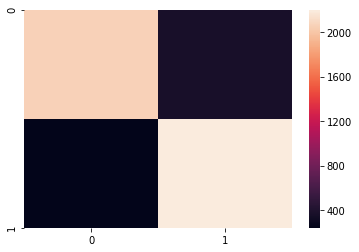

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict));

## 5. Export Model 

In [0]:
# Using pickle to export our trained model
import pickle
import os
pickle.dump(clf, open(os.path.join('logisticRegression.pkl'), 'wb'), protocol=4)